In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [26]:
def getDataPart(inputFiles):
    
    cols = []
    scalar = []
    
    scalar.append('xsec')
    scalar.append('ntrials') 
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('phi_photon')
    
    cols.append('pt_jet')
    cols.append('phi_jet')
    cols.append('z')
    
    lists = scalar + cols
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [28]:
file1 = ['$HOME/EIC/output/1220.root']
a = getDataPart(file1)


Processed $HOME/EIC/output/1220.root in 15.9 seconds


In [29]:
b = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b = applyCut(b, 'Q2 > 25', 'Q2 > 25')
b = applyCut(b, 'pt_jet > 4', 'pt_jet > 4')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = applyCut(b, '4 < pt_jet < 5', '4 < pt_jet < 5')
b2 = applyCut(b, '5 < pt_jet < 10', '5 < pt_jet < 10')
b3 = applyCut(b, '10 < pt_jet < 15', '10 < pt_jet < 15')
b4 = applyCut(b, '15 < pt_jet < 20', '15 < pt_jet < 20')

0.1 < y < 0.85 736392  fraction kept: 17.7
Q2 > 25 106574  fraction kept: 14.5
pt_jet > 4 41241  fraction kept: 38.7
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 33808  fraction kept: 82.0
4 < pt_jet < 5 6590  fraction kept: 19.5
5 < pt_jet < 10 20410  fraction kept: 60.4
10 < pt_jet < 15 4970  fraction kept: 14.7
15 < pt_jet < 20 1350  fraction kept: 4.0


In [30]:
xvar_array = toArrayFloat(-2.2, 0, 0, log=True, logNum=15)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
x1, y1, xerr = getHist(b1, 'z', xvar_array)
x2, y2, xerr = getHist(b2, 'z', xvar_array)
x3, y3, xerr = getHist(b3, 'z', xvar_array)
x4, y4, xerr = getHist(b4, 'z', xvar_array)

In [31]:
print min(b['z'])

0.00636842148378


In [12]:
z_str = r'$z = |\vec{p}_{jet} \cdot \vec{p}_{hadron}| \left/ |\vec{p}_{jet}|^2 \right.$'

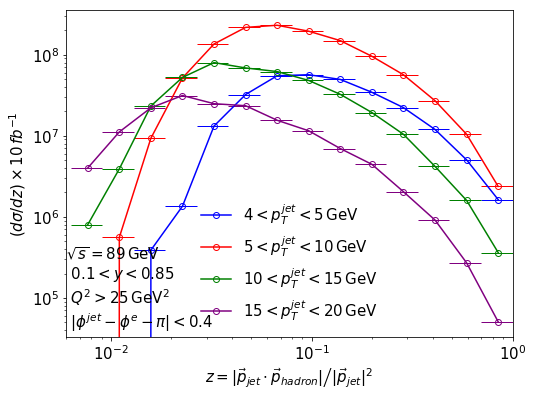

In [34]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), 'bo', fillstyle='none', linestyle='-', label='$4 < p_T^{jet} < 5 \, \mathrm{GeV}$')
plt.errorbar(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), 'ro', fillstyle='none', linestyle='-', label='$5 < p_T^{jet} < 10 \, \mathrm{GeV}$')
plt.errorbar(x3, 10*y3*xsec*1e12/(2*ntrials*xerr), xerr=xerr, fmt='none', color='g', elinewidth=1)
plt.plot(x3, 10*y3*xsec*1e12/(2*ntrials*xerr), 'go', fillstyle='none', linestyle='-', label='$10 < p_T^{jet} < 15 \, \mathrm{GeV}$')
plt.errorbar(x4, 10*y4*xsec*1e12/(2*ntrials*xerr), xerr=xerr, fmt='none', color='purple', elinewidth=1)
plt.plot(x4, 10*y4*xsec*1e12/(2*ntrials*xerr), color='purple', marker='o', linestyle='-',fillstyle='none', label='$15 < p_T^{jet} < 20 \, \mathrm{GeV}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(z_str, fontsize=15)
plt.ylabel(r'$(d\sigma/dz) \times 10 \, fb^{-1}$', fontsize=15)
plt.xlim(left=0.006, right=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(0.006,4e4,'$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 \, \mathrm{GeV^2}$ \n $|\phi^{jet} - \phi^e - \pi|<0.4$',fontsize=15)
plt.savefig('images/z.pdf', bbox_inches='tight')